## Import Libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.linear_model import LinearRegression
sys.path.append('../')

## Reading Dataset

In [2]:
df = pd.read_csv("../datasets/calculated_features_final19356_253493_147567893553946290238604574175400014296.csv")
print(list(df.columns))
print(df.shape)

['scout_id', 'match_week', 'player_id', 'team_id', 'delta_price', 'position_id', 'year', 'name', 'has_played', 'score', 'average_points_last_1_rounds', 'average_price_last_1_rounds', 'team_points_last_1_rounds', 'team_goals_scored_last_1_rounds', 'team_goals_taken_last_1_rounds', 'enemy_goals_scored_last_1_rounds', 'enemy_goals_taken_last_1_rounds', 'enemy_points_last_1_rounds', 'home_team', 'team_goals_taken_last_1_rounds.1', 'average_plays_last_1_rounds_rb_play', 'average_plays_last_1_rounds_fc_play', 'average_plays_last_1_rounds_gc_play', 'average_plays_last_1_rounds_ca_play', 'average_plays_last_1_rounds_cv_play', 'average_plays_last_1_rounds_sg_play', 'average_plays_last_1_rounds_dd_play', 'average_plays_last_1_rounds_dp_play', 'average_plays_last_1_rounds_gs_play', 'average_plays_last_1_rounds_fs_play', 'average_plays_last_1_rounds_pe_play', 'average_plays_last_1_rounds_a_play', 'average_plays_last_1_rounds_ft_play', 'average_plays_last_1_rounds_fd_play', 'average_plays_last_1_ro

## Pre Processing

In [3]:
auxiliary = ['scout_id', 'match_week', 'player_id', 'team_id', 'position_id',
             'home_team.1', 'home_team.2', 'home_team.3', 'year', 'name', 'has_played',
             'team_goals_taken_last_1_rounds.1', 'team_goals_taken_last_5_rounds.1',
             'team_goals_taken_last_10_rounds.1', 'team_goals_taken_last_20_rounds.1', 'delta_price']

In [4]:
from data_science_utils.data_processing.data_processing import DatasetProcessing
dp = DatasetProcessing(df, auxiliary)
dp.correct_dataset()
dp.count_null()
dp.drop_zero_var()
dp.drop_null(max_null_ratio=0.4)
df = dp.hot_encode()
dp.fill_null(value = 0, feature_list=list(df.columns))

average_points_last_1_rounds......................1775
average_price_last_1_rounds.......................1775
team_points_last_1_rounds.........................770
team_goals_scored_last_1_rounds...................770
team_goals_taken_last_1_rounds....................770
enemy_goals_scored_last_1_rounds..................819
enemy_goals_taken_last_1_rounds...................819
enemy_points_last_1_rounds........................819
home_team.........................................241
average_plays_last_1_rounds_rb_play...............1775
average_plays_last_1_rounds_fc_play...............1775
average_plays_last_1_rounds_gc_play...............1775
average_plays_last_1_rounds_ca_play...............1775
average_plays_last_1_rounds_cv_play...............1775
average_plays_last_1_rounds_sg_play...............1775
average_plays_last_1_rounds_dd_play...............1775
average_plays_last_1_rounds_dp_play...............1775
average_plays_last_1_rounds_gs_play...............1775
average_plays_las

../data_science_utils/data_processing/data_processing.py:53: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  enc.fit(self.df.position_id.reshape(-1, 1))
../data_science_utils/data_processing/data_processing.py:54: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  position_encoded = enc.transform(self.df.position_id.reshape(-1, 1)).toarray()




FEATURES FILLED WITH 0



In [5]:
print(df.shape)

(32733, 114)


## Feature Visualization

## Feature Selection

## Train, validation, test

In [6]:
from data_science_utils.data_processing.train_test_split import TrainTest
tts = TrainTest(df, auxiliary)
tts.split_dataset(train_ratio=0.8)
tts.normalize_data()

/home/noixd/Projects/cartolaAPI/env_cartola/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [7]:
model = LinearRegression
model_params = {}
model, train_preds, train_eval = tts.evaluate_train(model, model_params)
test_preds, test_eval = tts.evaluate_test()

Evaluating Train Data: 
Prediction Std Dev: 0.93872856787
Prediction Avg: 2.54909072655
Desired Std Dev: 4.03746689214
Desired Avg: 2.54909111739
Explained Variance: 0.0540439028626
Mean Absolute error: 2.95584134785
RMS Error: 3.9268513770640716
Median Abs Error: 2.35830841064
R2 Score: 0.0540439028626
Evaluating Test Data: 
Prediction Std Dev: 0.947933065585
Prediction Avg: 2.55471785897
Desired Std Dev: 4.11354832029
Desired Avg: 2.65770581946
Explained Variance: 0.0471833373265
Mean Absolute error: 3.00792284132
RMS Error: 4.01665082516704
Median Abs Error: 2.34588025035
R2 Score: 0.0465565218526


## Result Analysis

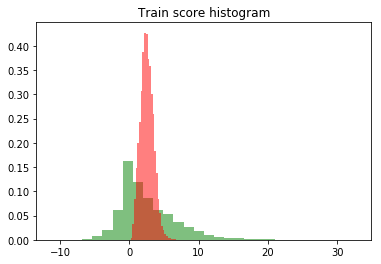

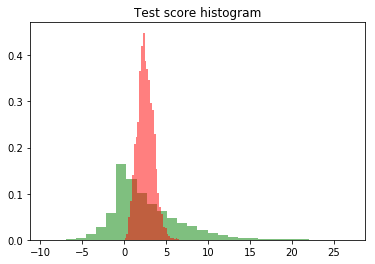

In [8]:
from data_science_utils.result_analysis.visualization import ResultsVisualization
rv = ResultsVisualization( y_test = tts.y_test, test_score=test_preds,
                          y_train = tts.y_train, train_score=train_preds, model=tts.model)
rv.score_hist()

In [9]:
from data_science_utils.result_analysis.evaluation_metrics import EvaluationMetrics
em = EvaluationMetrics(df=df, y_train=tts.y_train, y_test=tts.y_test,
                       train_score=train_preds, test_score=test_preds)

In [10]:
_ = em.eval_top(match_week=20, year=2016, number_of_players=50, real=True)

Top 50 real performances compared to expected performance for position all on round 20 on year 2016
Evaluating Data: 
Predited total points: 145.913862676
Real total points: 430.2
Prediction Std Dev: 0.934397816436
Prediction Avg: 2.91827725353
Desired Std Dev: 3.15156849838
Desired Avg: 8.604
Explained Variance: -0.0866536849698
Mean Absolute error: 5.68572274647
RMS Error: 6.566620502504046
Median Abs Error: 4.715292235
R2 Score: -3.34140532866






In [11]:
_ = em.eval_top(match_week=20, year=2016, number_of_players=50, real=False)

Top 50 Predicted players metrics compared to real performance for position all on round 20 on year 2016
Evaluating Data: 
Predited total points: 188.509252996
Real total points: 205.5
Prediction Std Dev: 0.503883545316
Prediction Avg: 3.77018505992
Desired Std Dev: 3.94209335252
Desired Avg: 4.11
Explained Variance: 0.00559706726886
Mean Absolute error: 3.09937740011
RMS Error: 3.9457059201662523
Median Abs Error: 2.79502182007
R2 Score: -0.00183365669687






In [12]:
best_real_team, _ = em.get_best_team(match_week=20, year=2016, team_formation=(2,2,3,3), real=True)
best_predicted_team, _ = em.get_best_team(match_week=20, year=2016, team_formation=(2,2,3,3), real=False)

Selecting best real performing team for match_week 20 on year 2016 
Evaluating Data: 
Predited total points: 27.4418652477
Real total points: 137.6
Prediction Std Dev: 0.55502581455
Prediction Avg: 2.74418652477
Desired Std Dev: 1.8537529501
Desired Avg: 13.76
Explained Variance: 0.0411566612446
Mean Absolute error: 11.0158134752
RMS Error: 11.16436813126654
Median Abs Error: 10.4729750353
R2 Score: -35.271422352




Selecting best predicted performing team for match_week 20 on year 2016 
Evaluating Data: 
Predited total points: 45.5617154064
Real total points: 46.6
Prediction Std Dev: 0.526829581295
Prediction Avg: 4.55617154064
Desired Std Dev: 2.53740024434
Desired Avg: 4.66
Explained Variance: 0.0841536816147
Mean Absolute error: 2.19805282593
RMS Error: 2.4305072074087084
Median Abs Error: 2.1034072876
R2 Score: 0.0824792983869






In [13]:
best_real_team.style

,scout_id,match_week,player_id,team_id,position_id,score,preds,name,year,has_played
38508,88754,20,62130,266,2,14.1,3.48208,William Matheus,2016,True
4259,27304,20,42145,275,2,11.3,2.69489,Egídio,2016,True
7270,31061,20,78248,277,3,13.2,3.35515,Gustavo Henrique,2016,True
36311,84083,20,72605,275,3,12.2,1.87197,Vitor Hugo,2016,True
17191,41141,20,78548,277,4,16.5,2.43462,Jean Mota,2016,True
7742,32814,20,91102,287,4,13.7,2.17351,Flávio,2016,True
42668,96631,20,38421,283,4,12.2,2.16688,Rafinha,2016,True
17773,50114,20,38910,277,5,17.6,3.10659,Ricardo Oliveira,2016,True
11062,38061,20,90302,284,5,13.9,2.697,Pedro Rocha,2016,True
23472,59631,20,86757,284,5,12.9,3.45919,Everton,2016,True


In [14]:
best_predicted_team.style

,scout_id,match_week,player_id,team_id,position_id,score,preds,name,year,has_played
11772,39182,20,68725,287,2,8.7,5.84332,Diego Renan,2016,True
41220,93282,20,71892,266,2,7.1,4.75742,Wellington Silva,2016,True
11919,39416,20,80853,284,3,4.1,4.39971,Pedro Geromel,2016,True
5068,24585,20,68887,266,3,6.7,3.88855,Gum,2016,True
32750,76137,20,87863,283,4,3.8,4.84985,Arrascaeta,2016,True
16472,47969,20,87999,266,4,0.7,4.77441,Gustavo Scarpa,2016,True
29927,70420,20,87552,277,4,5.8,4.02279,Vitor Bueno,2016,True
36482,84370,20,68952,287,5,6.2,4.47851,Marinho,2016,True
5706,29592,20,42116,283,5,1.2,4.38291,Willian,2016,True
39841,89976,20,37798,283,5,2.3,4.16424,Rafael Sobis,2016,True


In [15]:
for position in range(2,6):
    em.eval_top(position=position, match_week=20, year=2016, real=True, number_of_players=5)

Top 5 real performances compared to expected performance for position 2 on round 20 on year 2016
Evaluating Data: 
Predited total points: 18.9367758245
Real total points: 53.2
Prediction Std Dev: 1.18295253998
Prediction Avg: 3.7873551649
Desired Std Dev: 2.03725305252
Desired Avg: 10.64
Explained Variance: -0.984773217436
Mean Absolute error: 6.8526448351
RMS Error: 7.429424203639684
Median Abs Error: 7.93754717885
R2 Score: -12.2990420195




Top 5 real performances compared to expected performance for position 3 on round 20 on year 2016
Evaluating Data: 
Predited total points: 14.3156973333
Real total points: 50.0
Prediction Std Dev: 0.513004357259
Prediction Avg: 2.86313946666
Desired Std Dev: 2.34350165351
Desired Avg: 10.0
Explained Variance: -0.15588280154
Mean Absolute error: 7.13686053334
RMS Error: 7.568545872120346
Median Abs Error: 6.44361102162
R2 Score: -9.4302415547




Top 5 real performances compared to expected performance for position 4 on round 20 on year 2016
Evalu

In [16]:
for position in range(2,6):
    em.eval_top(position=position, match_week=20, year=2016, real=False, number_of_players=5)

Top 5 Predicted players metrics compared to real performance for position 2 on round 20 on year 2016
Evaluating Data: 
Predited total points: 22.682259223
Real total points: 30.8
Prediction Std Dev: 0.722881626081
Prediction Avg: 4.53645184459
Desired Std Dev: 2.44425857879
Desired Avg: 6.16
Explained Variance: 0.347734841163
Mean Absolute error: 2.15453885471
RMS Error: 2.5559345801267566
Median Abs Error: 2.34257647572
R2 Score: -0.0934657167059




Top 5 Predicted players metrics compared to real performance for position 3 on round 20 on year 2016
Evaluating Data: 
Predited total points: 18.7498251409
Real total points: 26.8
Prediction Std Dev: 0.361846519664
Prediction Avg: 3.74996502818
Desired Std Dev: 1.16550418275
Desired Avg: 5.36
Explained Variance: -0.23857654512
Mean Absolute error: 1.72991966473
RMS Error: 2.067533552172768
Median Abs Error: 1.4016783434
R2 Score: -2.14686026896




Top 5 Predicted players metrics compared to real performance for position 4 on round 20 on 

In [17]:
_ = em.get_performance_without_outliers(match_week=20, year=2016, real=True)

Evaluation performance without the top and bottom 10 % performing players for round 20 on year 2016
Top 26186 real performances compared to expected performance for position all on round 20 on year 2016
Evaluating Data: 
Predited total points: 478.056481089
Real total points: 393.5
Prediction Std Dev: 0.908077786223
Prediction Avg: 2.50291351355
Desired Std Dev: 2.42327024898
Desired Avg: 2.06020942408
Explained Variance: 0.0820279025943
Mean Absolute error: 2.00195054276
RMS Error: 2.363585874549419
Median Abs Error: 2.00723736705
R2 Score: 0.048652741798






In [18]:
em.get_model_average_score()

Selecting best predicted performing team for match_week 2 on year 2015 
Selecting best predicted performing team for match_week 2 on year 2016 
Selecting best predicted performing team for match_week 2 on year 2017 
Selecting best predicted performing team for match_week 3 on year 2015 
Selecting best predicted performing team for match_week 3 on year 2016 
Selecting best predicted performing team for match_week 3 on year 2017 
Selecting best predicted performing team for match_week 4 on year 2015 
Selecting best predicted performing team for match_week 4 on year 2016 
Selecting best predicted performing team for match_week 4 on year 2017 
Selecting best predicted performing team for match_week 5 on year 2015 
Selecting best predicted performing team for match_week 5 on year 2016 
Selecting best predicted performing team for match_week 5 on year 2017 
Selecting best predicted performing team for match_week 6 on year 2015 
Selecting best predicted performing team for match_week 6 on yea

45.419567841225273